## Legandary Pokemon Classification

Given *data about various Pokemon*, let's try to predict if a given Pokemon is **legendary** or not. 

We will use a TensorFlow ANN to make our predictions.

Data source: https://www.kaggle.com/datasets/abcsds/pokemon

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('Pokemon.csv')
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [4]:
data_raw = data.copy()

### Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [6]:
data.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
data = data.drop(['Type 2', 'Name', '#'], axis=1)

### EDA

In [9]:
data['Legendary'] = data['Legendary'].astype(int)

In [10]:
data

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,318,45,49,49,65,65,45,1,0
1,Grass,405,60,62,63,80,80,60,1,0
2,Grass,525,80,82,83,100,100,80,1,0
3,Grass,625,80,100,123,122,120,80,1,0
4,Fire,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...
795,Rock,600,50,100,150,100,150,50,6,1
796,Rock,700,50,160,110,160,110,110,6,1
797,Psychic,600,80,110,60,150,130,70,6,1
798,Psychic,680,80,160,60,170,130,80,6,1


In [11]:
data['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [12]:
numeric_columns = data.drop('Type 1', axis=1).columns
numeric_columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation', 'Legendary'],
      dtype='object')

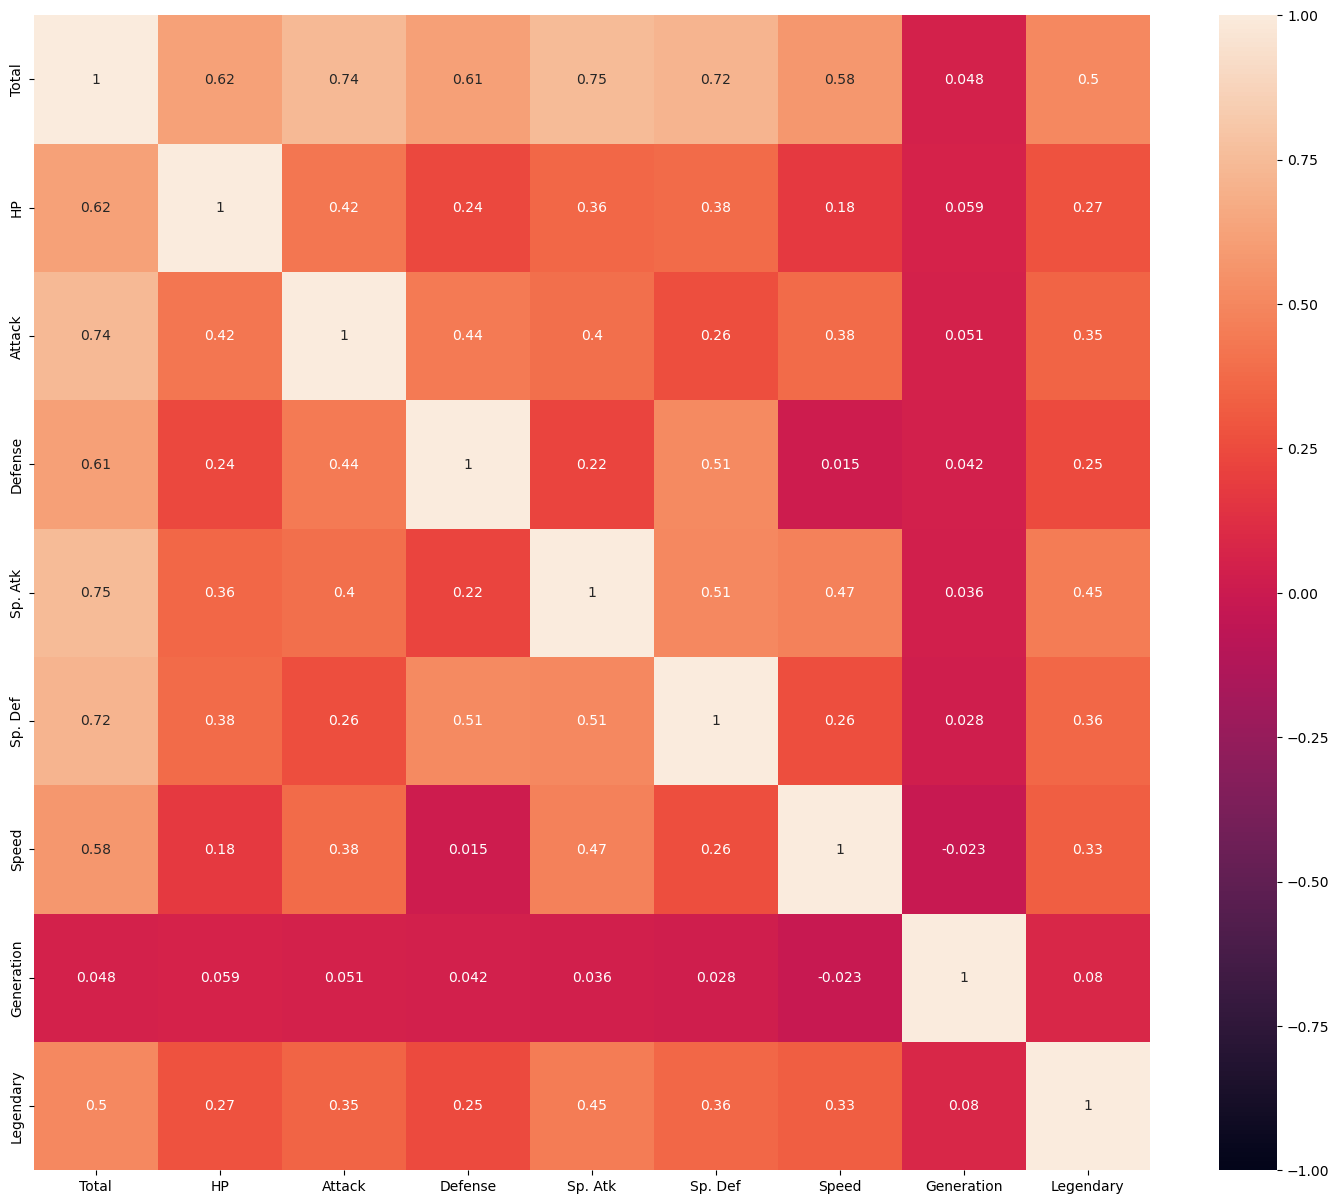

In [13]:
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1.0)
plt.show()

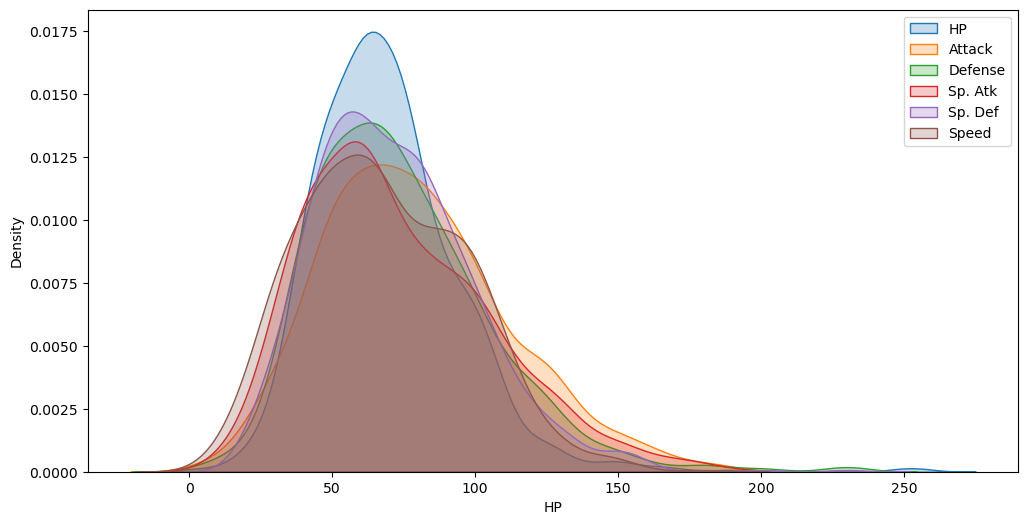

In [21]:
plt.figure(figsize=(12,6))
for column in numeric_columns.drop(['Total', 'Generation', 'Legendary']):
    sns.kdeplot(data[column], fill=True, label=column)
    plt.legend()
plt.show()

### Preprocessing

In [22]:
data.dtypes

Type 1        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary      int64
dtype: object

#### Encoding

In [26]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix, dtype=int)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [28]:
data = onehot_encode(data, 'Type 1', 't')
data

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,t_Bug,...,t_Ghost,t_Grass,t_Ground,t_Ice,t_Normal,t_Poison,t_Psychic,t_Rock,t_Steel,t_Water
0,318,45,49,49,65,65,45,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,405,60,62,63,80,80,60,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,525,80,82,83,100,100,80,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,625,80,100,123,122,120,80,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,309,39,52,43,60,50,65,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6,1,0,...,0,0,0,0,0,0,0,1,0,0
796,700,50,160,110,160,110,110,6,1,0,...,0,0,0,0,0,0,0,1,0,0
797,600,80,110,60,150,130,70,6,1,0,...,0,0,0,0,0,0,1,0,0,0
798,680,80,160,60,170,130,80,6,1,0,...,0,0,0,0,0,0,1,0,0,0


### Splitting and Scaling 

In [30]:
y = data['Legendary']
X = data.drop('Legendary', axis=1)

In [31]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

### Training

In [33]:
X.shape

(800, 26)

In [43]:
inputs = tf.keras.Input(shape=(26,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

batch_size = 32
epochs = 100

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size = batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/100
14/14 [==============================] - 1s 34ms/step - loss: 0.4237 - accuracy: 0.8795 - auc: 0.5289 - val_loss: 0.3547 - val_accuracy: 0.9018 - val_auc: 0.5446 - lr: 0.0010
Epoch 2/100
14/14 [==============================] - 0s 11ms/step - loss: 0.2670 - accuracy: 0.9152 - auc: 0.7856 - val_loss: 0.2785 - val_accuracy: 0.9018 - val_auc: 0.7849 - lr: 0.0010
Epoch 3/100
14/14 [==============================] - 0s 12ms/step - loss: 0.1996 - accuracy: 0.9219 - auc: 0.9131 - val_loss: 0.2306 - val_accuracy: 0.9196 - val_auc: 0.8767 - lr: 0.0010
Epoch 4/100
14/14 [==============================] - 0s 11ms/step - loss: 0.1626 - accuracy: 0.9442 - auc: 0.9506 - val_loss: 0.2015 - val_accuracy: 0.9018 - val_auc: 0.9257 - lr: 0.0010
Epoch 5/100
14/14 [==============================] - 0s 10ms/step - loss: 0.1371 - accuracy: 0.9554 - auc: 0.9662 - val_loss: 0.1841 - val_accuracy: 0.9018 - val_auc: 0.9433 - lr: 0.0010
Epoch 6/100
14/14 [==============================] - 0s 12ms/step

### Results

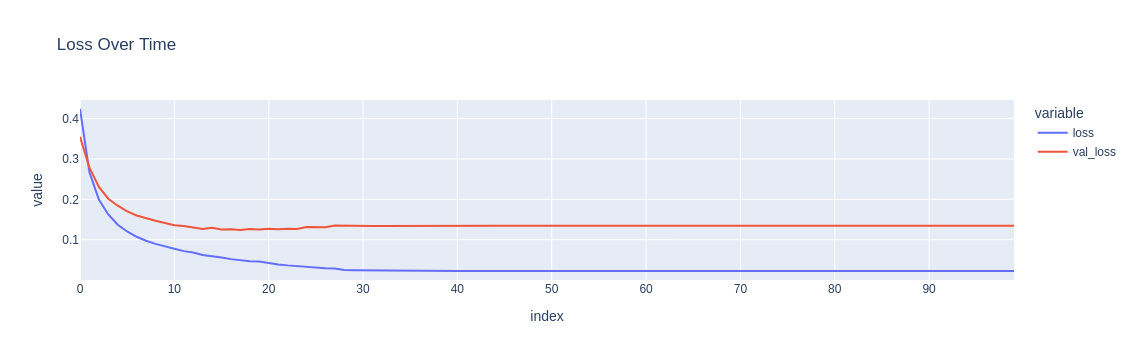

In [44]:
fig_loss = px.line(
    history.history,
    y = ['loss', 'val_loss'],
    labels = {'x': 'Epoch', 'y': 'Loss'},
    title = 'Loss Over Time'
)

fig_loss.show()

In [45]:
np.argmin(history.history['val_loss'])

17

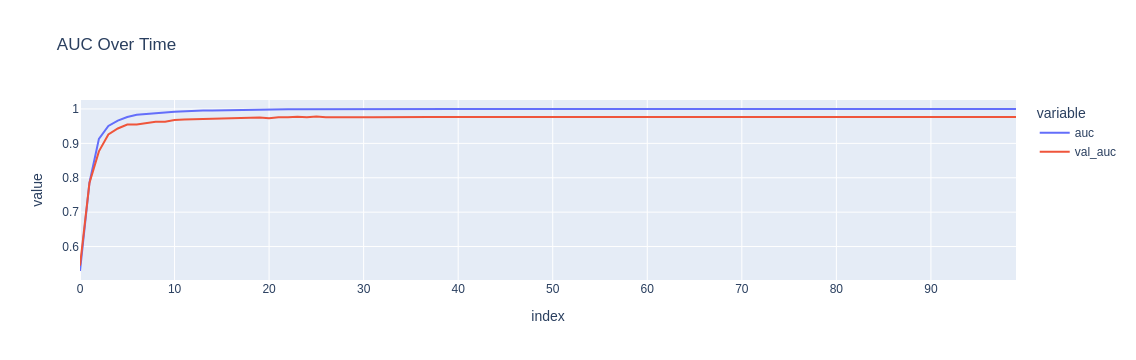

In [46]:
fig_auc = px.line(
    history.history,
    y = ['auc', 'val_auc'],
    labels = {'x': 'Epoch', 'y': 'Loss'},
    title = 'AUC Over Time'
)

fig_auc.show()

In [47]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 4ms/step - loss: 0.1127 - accuracy: 0.9583 - auc: 0.9748


[0.11274790018796921, 0.9583333134651184, 0.9748147130012512]

### Post Training Analysis

In [63]:
predictions = (np.squeeze((model.predict(X_test) >= 0.5).astype(int)) != y_test).astype(int)
predictions

8/8 [==============================] - 0s 3ms/step


696    0
667    0
63     0
533    0
66     0
      ..
220    0
450    0
380    0
132    0
375    0
Name: Legendary, Length: 240, dtype: int64

In [64]:
predictions.sum()

10

In [68]:
y_test[predictions.astype(bool)]

306    0
275    0
715    0
425    1
409    0
776    0
264    1
527    0
196    0
158    1
Name: Legendary, dtype: int64

In [69]:
mislabeled_indices = y_test[predictions.astype(bool)].index

In [71]:
data_raw.loc[mislabeled_indices, :]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
306,282,GardevoirMega Gardevoir,Psychic,Fairy,618,68,85,65,165,135,100,3,False
275,254,SceptileMega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,False
715,648,MeloettaAria Forme,Normal,Psychic,600,100,77,77,128,128,90,5,False
425,384,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,True
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
776,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False
264,245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True
527,475,GalladeMega Gallade,Psychic,Fighting,618,68,165,95,65,115,110,4,False
196,181,AmpharosMega Ampharos,Electric,Dragon,610,90,95,105,165,110,45,2,False
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True


In [74]:
X.shape

(800, 26)

In [99]:
pca = PCA(n_components=2)

data_reduced = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2'])

In [100]:
data_reduced

,PC1,PC2
0,-1.924435,-0.301313
1,-0.563095,-0.343799
2,1.312335,-0.368696
3,2.861397,0.182741
4,-1.906093,-1.213531
...,...,...
795,2.812749,3.162343
796,4.280396,1.377938
797,3.084299,-1.492571
798,4.323720,-1.593276


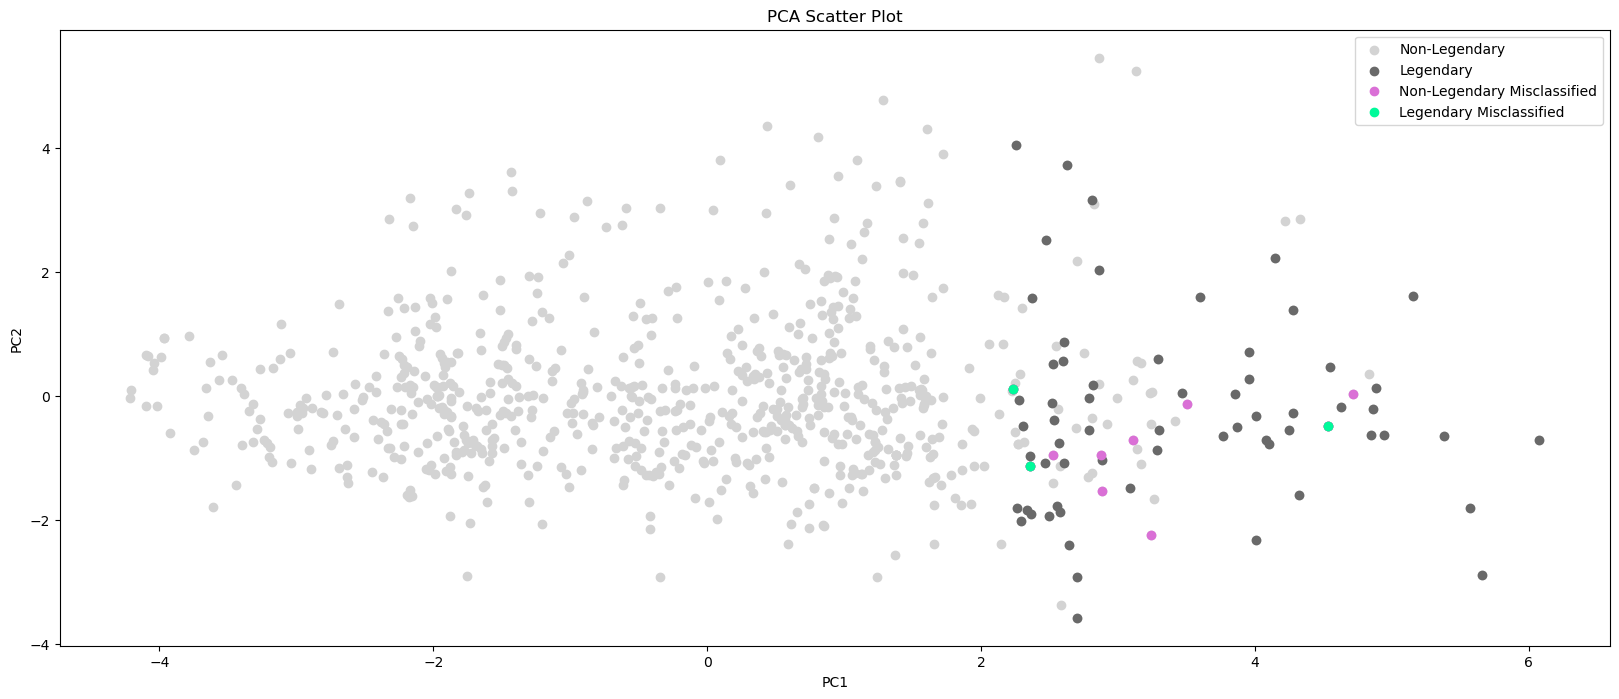

In [111]:
plt.figure(figsize=(20,8))
plt.scatter(data_reduced['PC1'], data_reduced['PC2'], c='lightgray')
plt.scatter(data_reduced.loc[legendary_indices, 'PC1'], data_reduced.loc[legendary_indices, 'PC2'], c='dimgray')
plt.scatter(data_reduced.loc[mislabeled_indices, 'PC1'], data_reduced.loc[mislabeled_indices, 'PC2'], c='orchid')
plt.scatter(data_reduced.loc[mislabeled_legendary_indices, 'PC1'], data_reduced.loc[mislabeled_legendary_indices, 'PC2'], c='mediumspringgreen')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(['Non-Legendary', 'Legendary', 'Non-Legendary Misclassified', 'Legendary Misclassified'])
plt.title('PCA Scatter Plot')
plt.show()

In [102]:
legendary_indices = data.query("Legendary == 1").index

In [106]:
mislabeled_legendary_indices = np.intersect1d(mislabeled_indices, legendary_indices)
mislabeled_legendary_indices

array([158, 264, 425])